# PetFinder.my Adoption Prediction

Target: Predict the speed at which a pet is adopted, based on the pet’s listing on PetFinder

Source: https://www.kaggle.com/c/petfinder-adoption-prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import folium

import os
import cv2

%matplotlib inline
pd.set_option('max_columns', 30)

In [2]:
# DIY

def missing_values(df):
    for column in df.columns:
        null_rows = df[column].isnull()
        if null_rows.any() == True:
            print('%s: %d nulls' % (column, null_rows.sum()))
            
def cicle(df):    
    plt.figure(figsize=(10,7))
    names= 'Dog', 'Cat'
    size=df['Type'].value_counts()
    my_circle=plt.Circle((0,0), 0.7, color='white')
    plt.pie(size, labels=names, colors=['skyblue','red'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title('Type of pets distribution', fontsize=15)
    plt.show()
    
def buzz_name(txt):
    wordcloud = WordCloud(width=480, height=480, max_font_size=50, min_font_size=10).generate(dog_txt)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    
def show_rand_img():    
    plt.rc('axes', grid = True)
    _, ax = plt.subplots(1, 3, figsize=(20, 20))
    images_train = os.listdir("input/train_images/")
    random_img = np.random.randint(0, len(images_train) - 3)

    for i , file in enumerate(images_train[random_img:random_img + 3]):
        img = cv2.imread('input/train_images/{}'.format(file))
        ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
df_train = pd.read_csv('input/train/train.csv')
df_breed = pd.read_csv('input/csv/breed_labels.csv')
df_color = pd.read_csv('input/csv/color_labels.csv')
df_state = pd.read_csv('input/csv/state_labels.csv')

In [4]:
df_train.sample(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
11479,2,Blue Kittens,1,266,289,2,6,0,0,2,1,1,1,3,1,4,0,41330,530f57b53cb3199e1d5e67733ddc0876,0,Beautiful Russian Blue-mixed MaMa Cat gave bir...,9d602bd84,5.0,3
9506,2,Darcy,3,264,0,2,1,0,0,1,3,2,2,1,1,1,50,41401,3babd92c93a7a4f4c72d6efe4cbf521b,0,This kitten was previously afraid of humans. N...,404eab70f,1.0,2
503,1,NaN,48,307,0,2,3,0,0,2,3,1,1,1,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Dumped by owner when pregnant. Has Spitz mixed...,5d1fa8ddf,1.0,2


In [5]:
df_train.shape

(14993, 24)

In [6]:
df_breed.sample(5)

,BreedID,Type,BreedName
111,112,1,Great Pyrenees
16,17,1,Australian Terrier
281,281,2,Ocicat
299,299,2,Tabby
213,214,1,Staffordshire Bull Terrier


In [7]:
df_color

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [8]:
df_state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [10]:
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [11]:
df_train.isnull().any().any()

True

In [12]:
missing_values(df_train)

Name: 1257 nulls
Description: 12 nulls


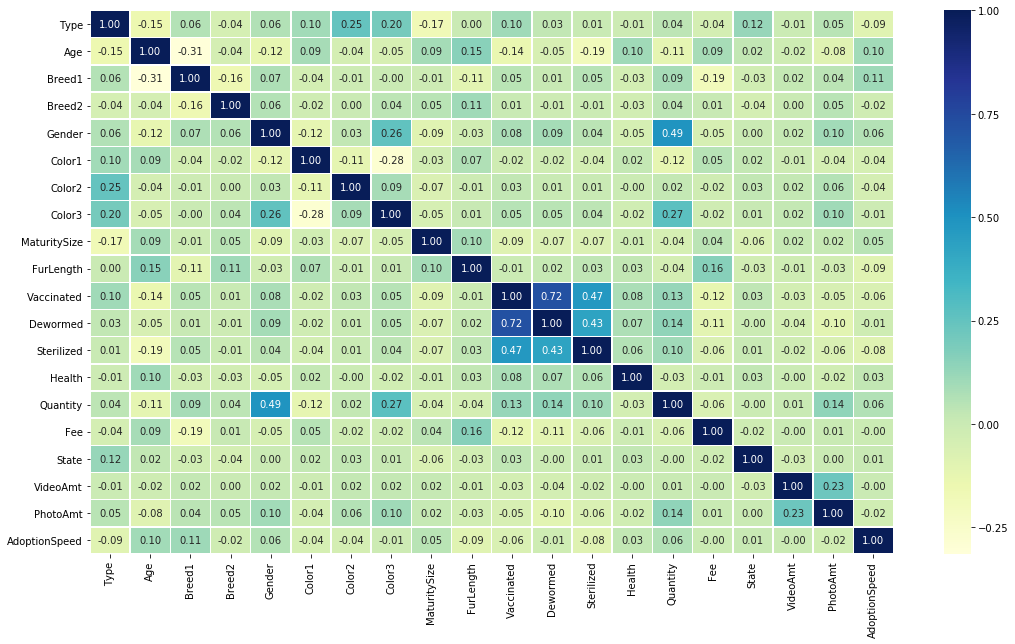

In [13]:
plt.rcParams['figure.figsize']=(18,10)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt = ".2f", cmap="YlGnBu");

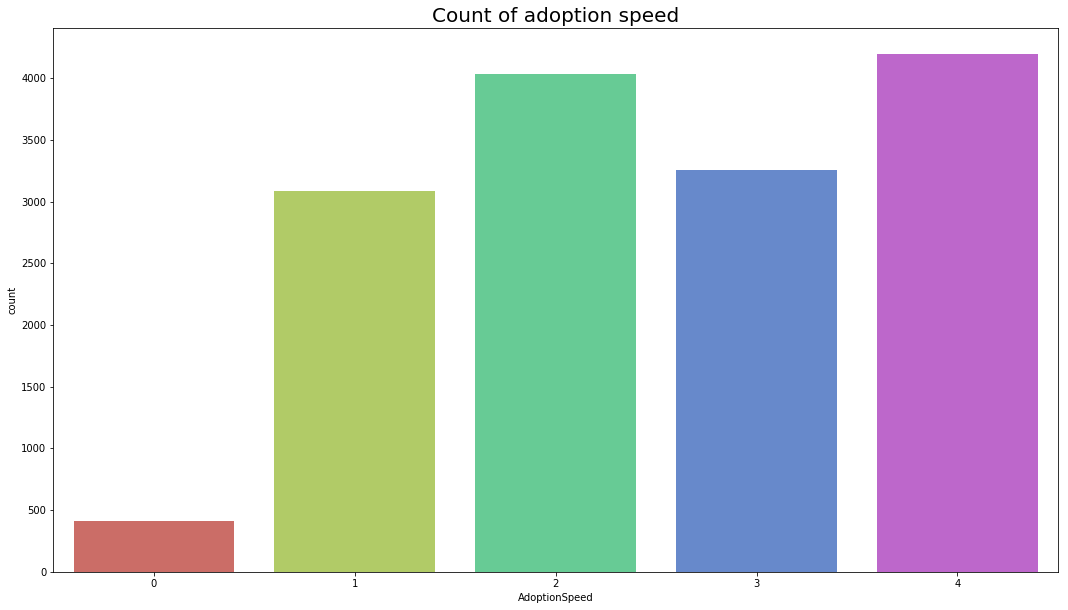

In [14]:
# target variable
ax = sns.countplot(x = 'AdoptionSpeed', data = df_train, palette = 'hls');
ax.set_title(label='Count of adoption speed', fontsize=20);

0 - Pet was adopted on the same day as it was listed.  
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.  
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.  
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.  
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). 

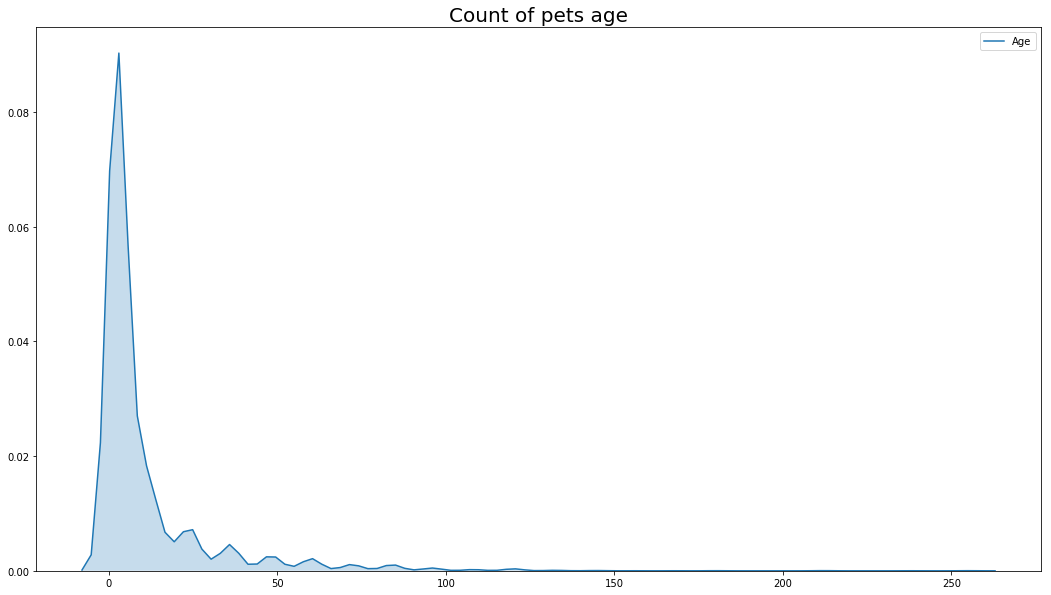

In [15]:
ax = sns.kdeplot(df_train['Age'], shade=True);
ax.set_title(label='Count of pets age', fontsize=20);

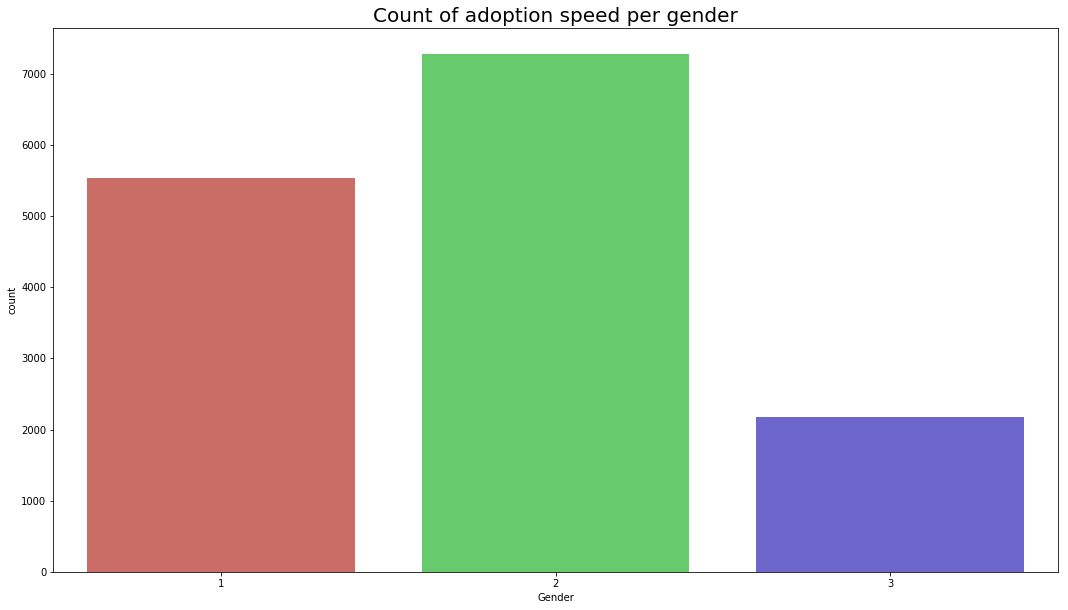

In [16]:
ax = sns.countplot(x = 'Gender', data = df_train, palette = 'hls');
ax.set_title(label='Count of adoption speed per gender', fontsize=20);

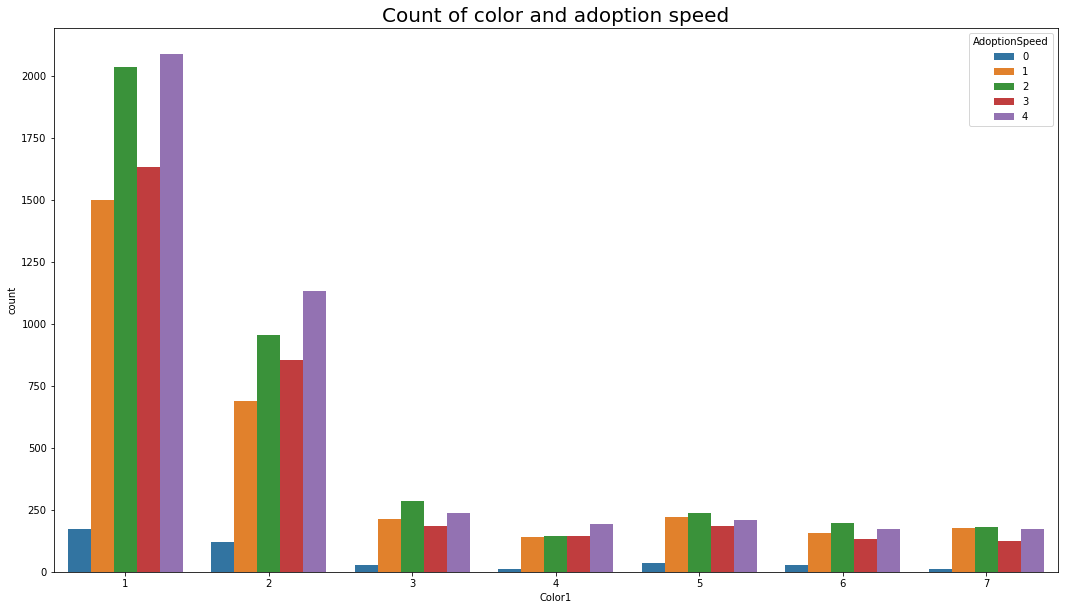

In [17]:
ax = sns.countplot(x="Color1", data=df_train, hue="AdoptionSpeed")
ax.set_title(label='Count of color and adoption speed', fontsize=20);

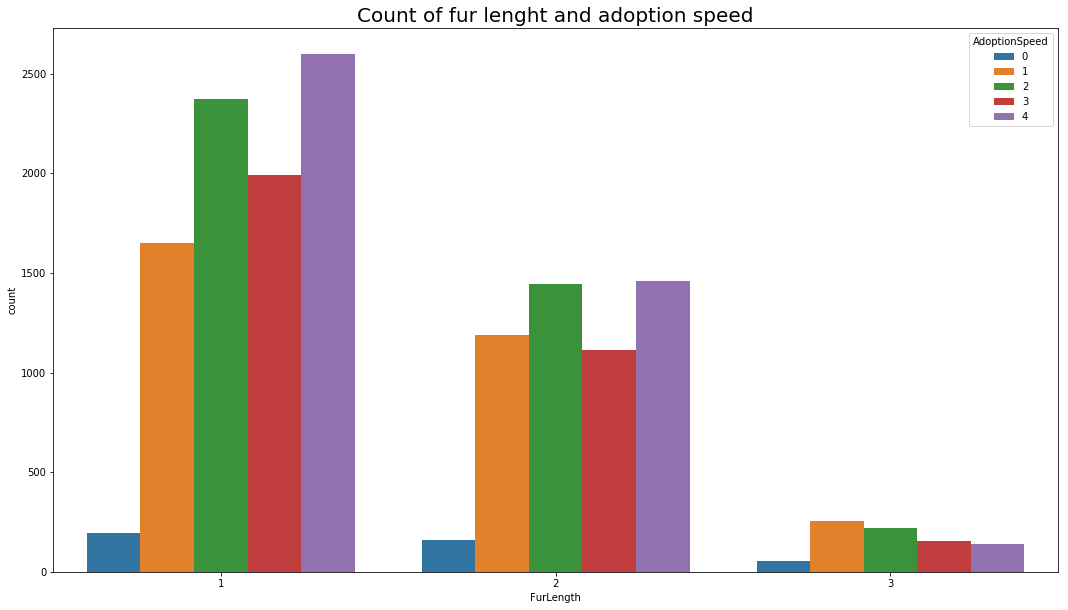

In [18]:
ax = sns.countplot(x="FurLength", data=df_train, hue="AdoptionSpeed")
ax.set_title(label='Count of fur lenght and adoption speed', fontsize=20);

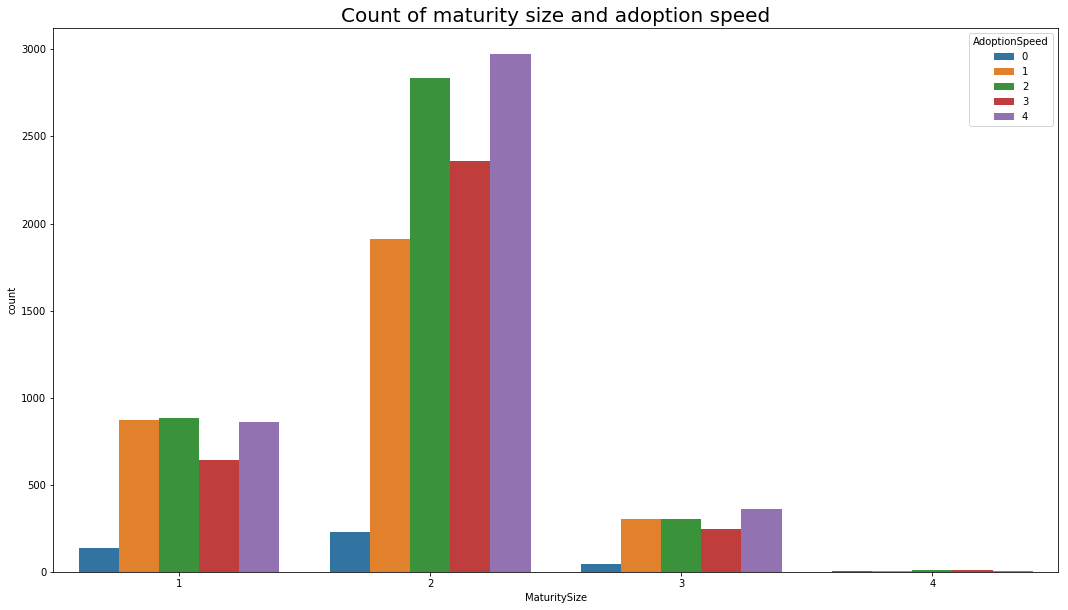

In [19]:
ax = sns.countplot(x="MaturitySize", data=df_train, hue="AdoptionSpeed")
ax.set_title(label='Count of maturity size and adoption speed', fontsize=20);

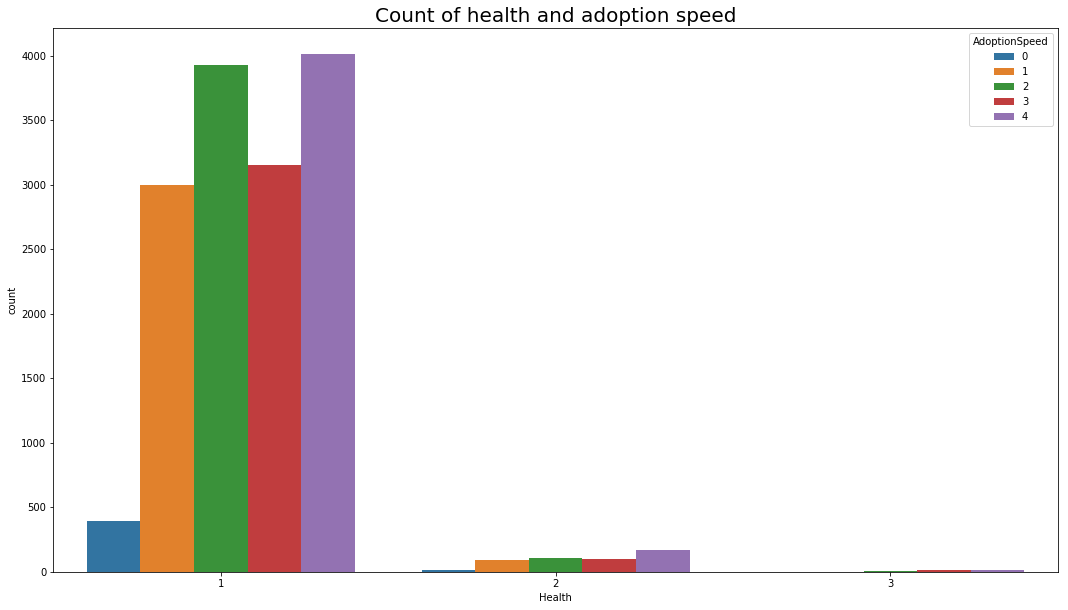

In [20]:
ax = sns.countplot(x="Health", data=df_train, hue="AdoptionSpeed")
ax.set_title(label='Count of health and adoption speed', fontsize=20);

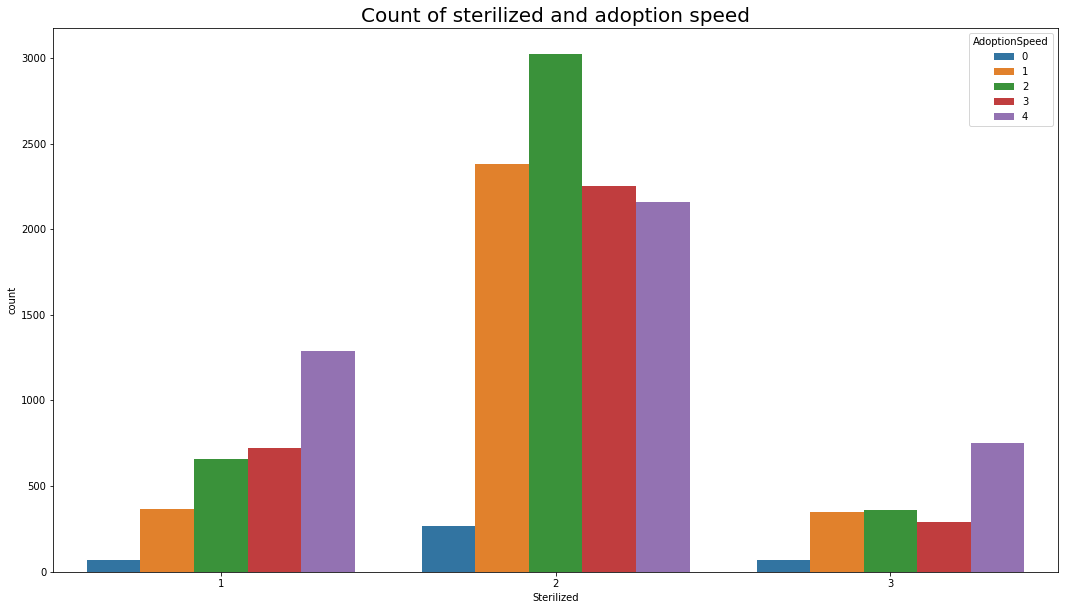

In [21]:
ax = sns.countplot(x="Sterilized", data=df_train, hue="AdoptionSpeed")
ax.set_title(label='Count of sterilized and adoption speed', fontsize=20);

In [22]:
# we have two type of animals - dog(1) and cat(2)
df_train['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

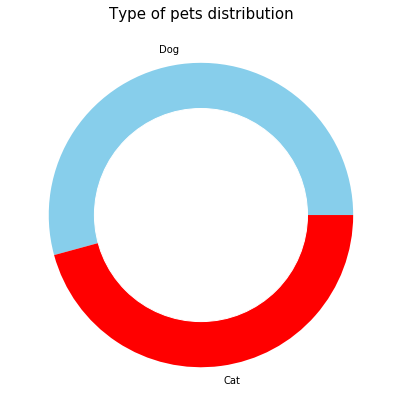

In [23]:
cicle(df_train)

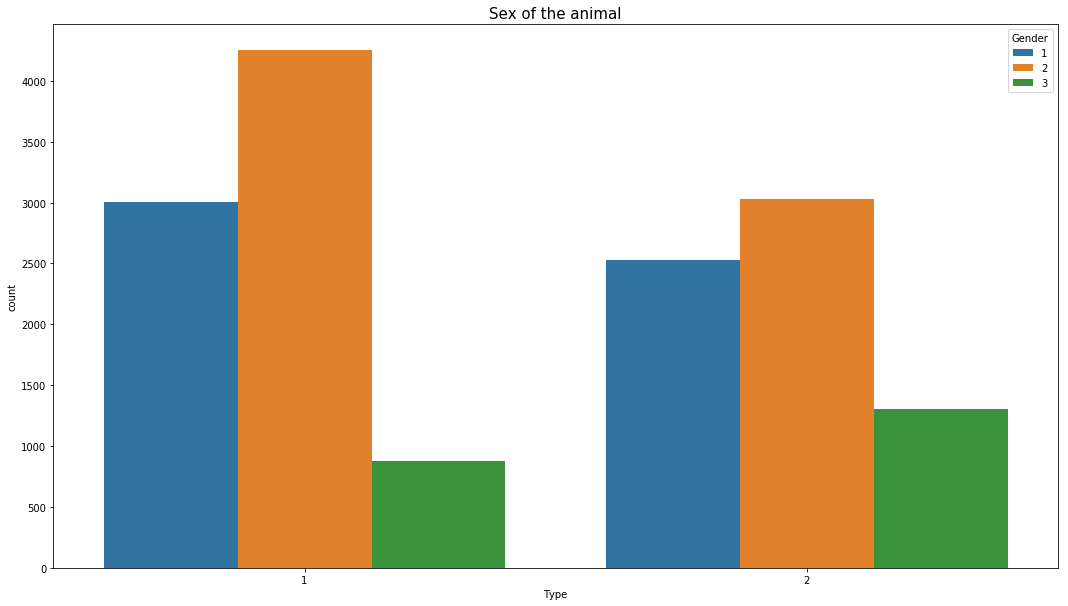

In [24]:
ax = sns.countplot(x='Type',hue='Gender',data=df_train);
ax.set_title(label='Sex of the animal', fontsize=15);

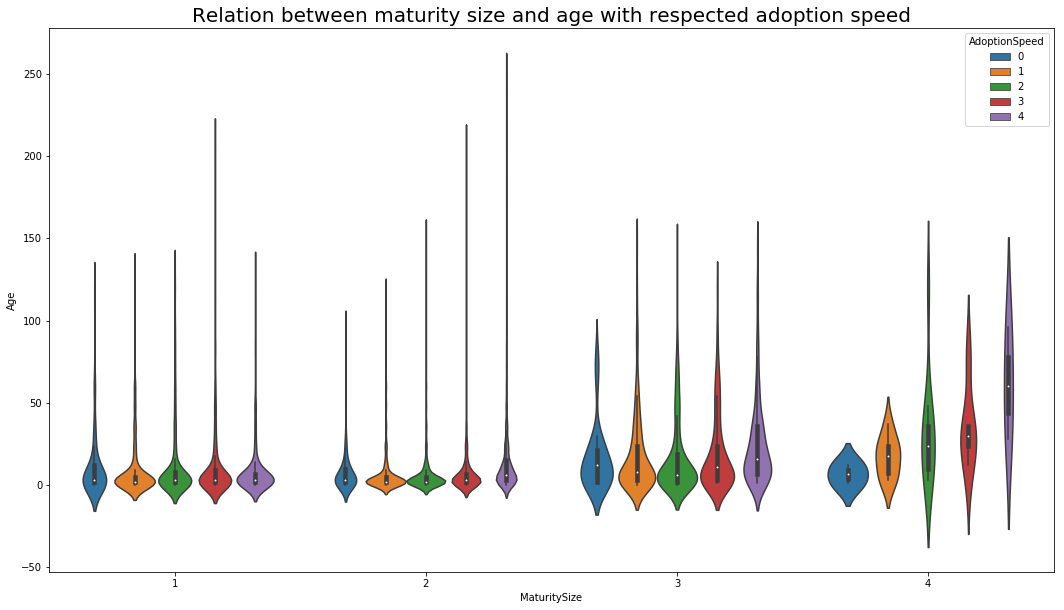

In [25]:
ax = sns.violinplot(x='MaturitySize', y='Age',
                     hue='AdoptionSpeed',
                     data=df_train)
ax.set_title(label='Relation between maturity size and age with respected adoption speed', fontsize=20);

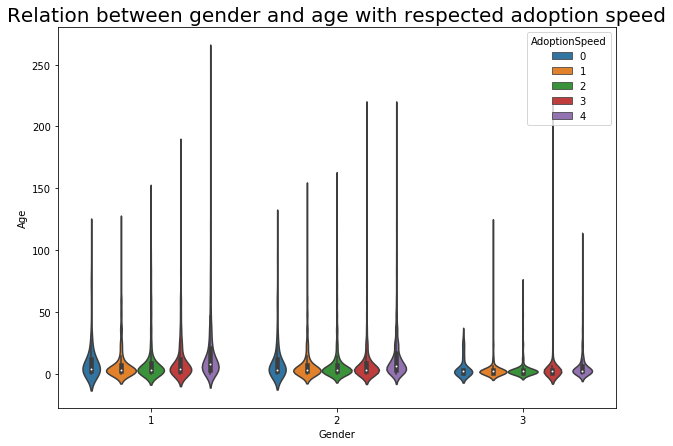

In [26]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x='Gender', y='Age',
                     hue='AdoptionSpeed',
                     data=df_train)
ax.set_title(label='Relation between gender and age with respected adoption speed', fontsize=20);

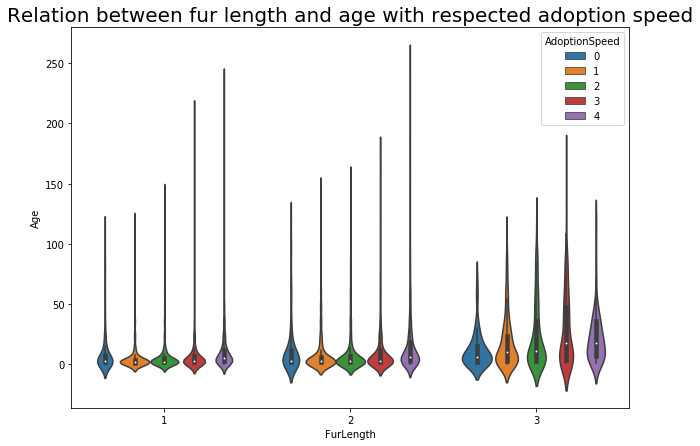

In [27]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x='FurLength', y='Age',
                     hue='AdoptionSpeed',
                     data=df_train)
ax.set_title(label='Relation between fur length and age with respected adoption speed', fontsize=20);

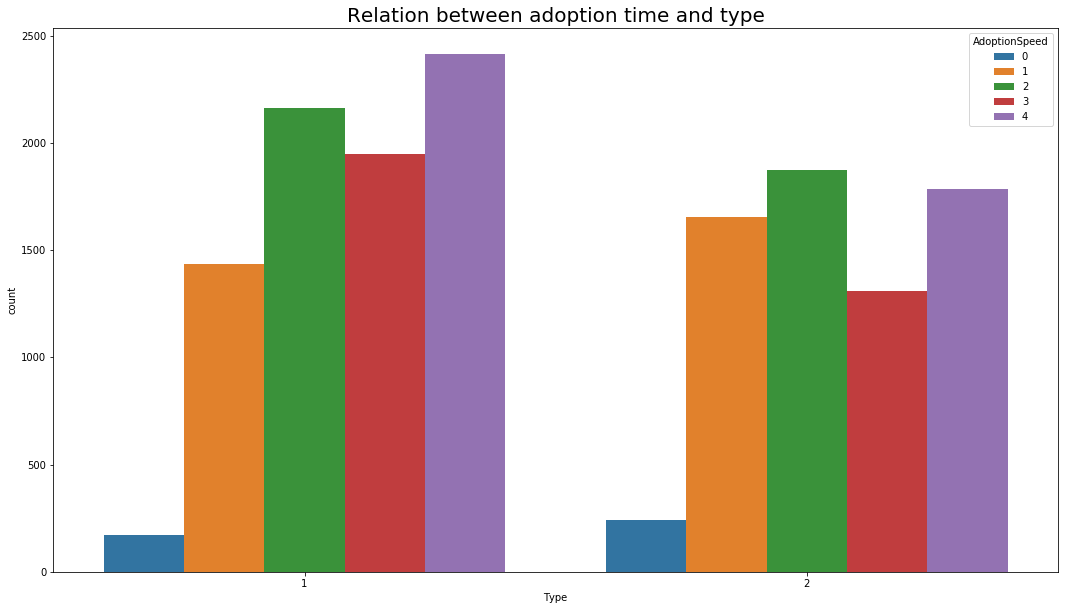

In [28]:
plt.title('Adoption time:')
ax = sns.countplot(x='Type',hue='AdoptionSpeed',data=df_train);
ax.set_title(label='Relation between adoption time and type', fontsize=20);

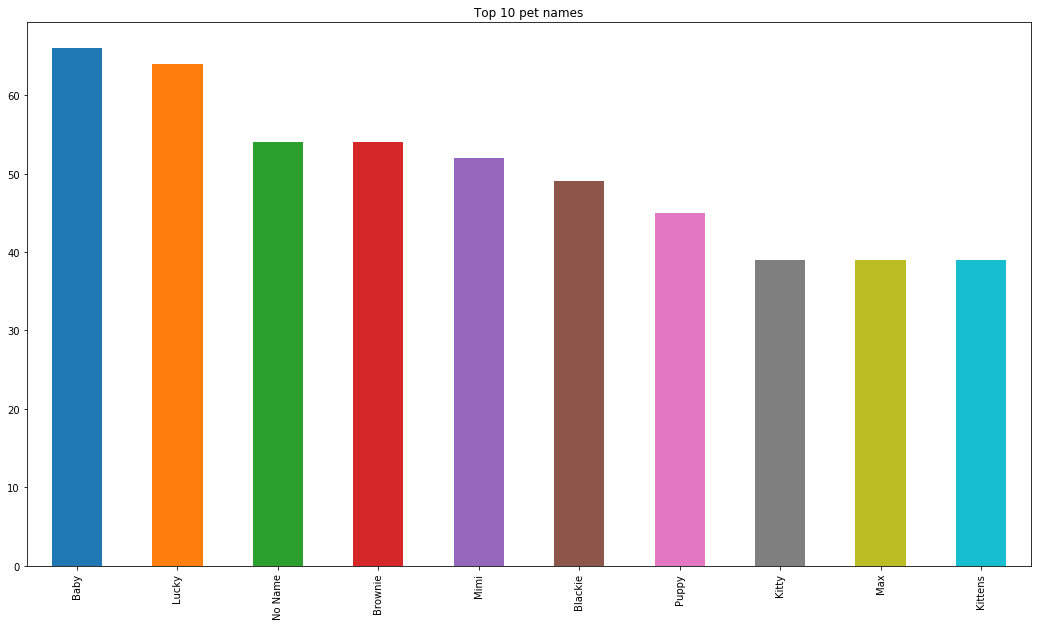

In [29]:
top10_names = df_train['Name'].value_counts().head(10)
top10_names.plot(kind='bar', title = 'Top 10 pet names');

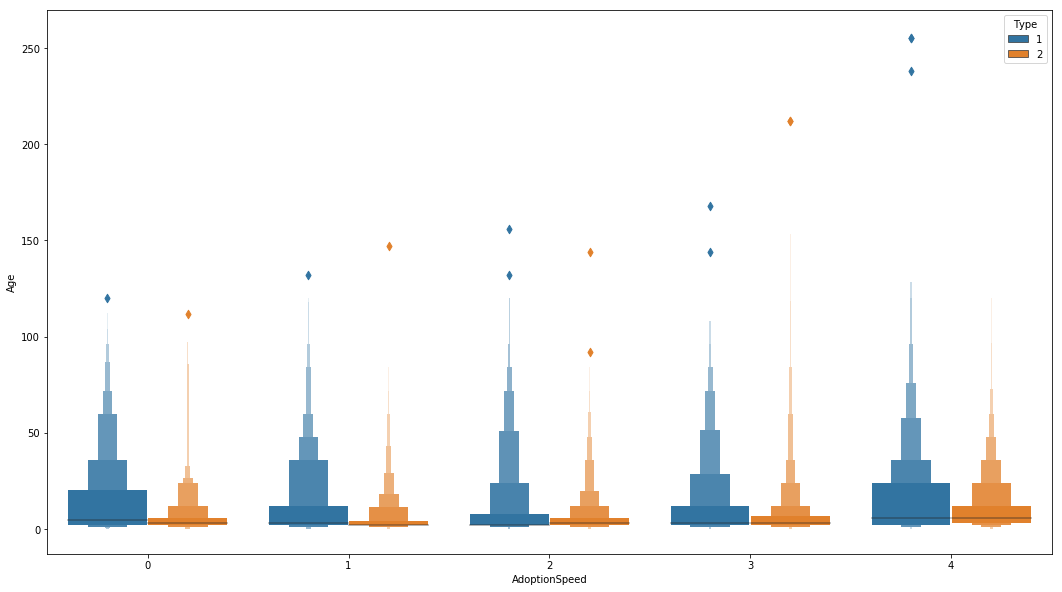

In [30]:
sns.boxenplot(y='Age',x='AdoptionSpeed',hue='Type',data=df_train);

In [31]:
df_train[df_train['Age'] == df_train['Age'].max()]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
5160,1,Happy-FIFI,255,307,0,1,2,7,0,2,2,3,3,3,1,1,0,41330,94fdeec413a441bca0de9e9887edcc70,0,very suitable to be a guard. easy handle. :) c...,5971c2462,3.0,4
11172,1,FiFi,255,307,0,1,2,7,0,2,2,3,3,3,1,1,0,41330,94fdeec413a441bca0de9e9887edcc70,0,very suitable to be a guard. easy handle. :) c...,50682d0f1,1.0,4


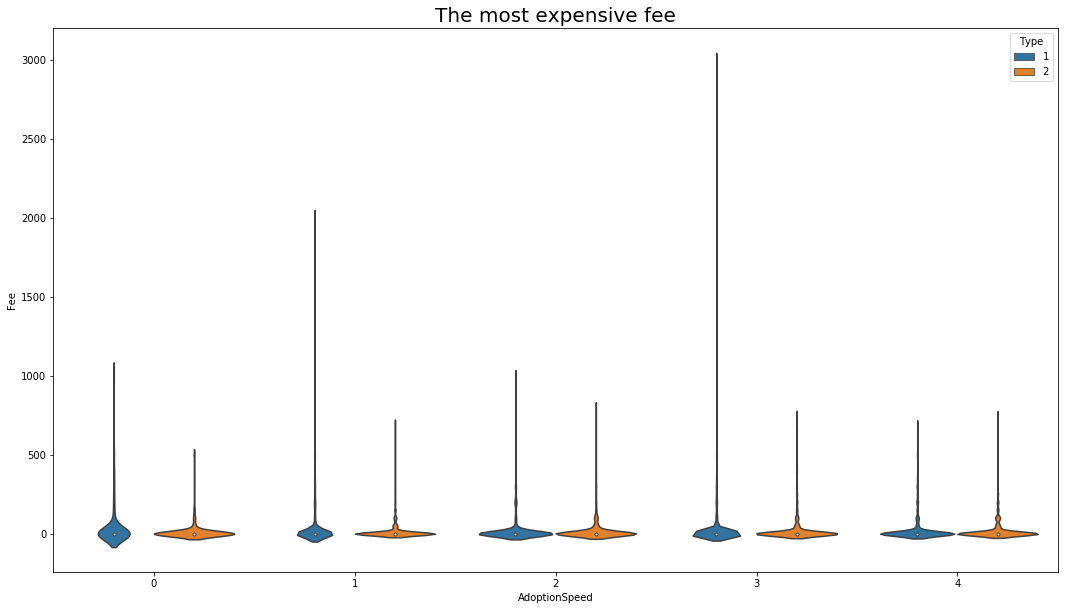

In [32]:
ax = sns.violinplot(y='Fee',x='AdoptionSpeed',hue='Type',data=df_train);
ax.set_title(label='The most expensive fee', fontsize=20);

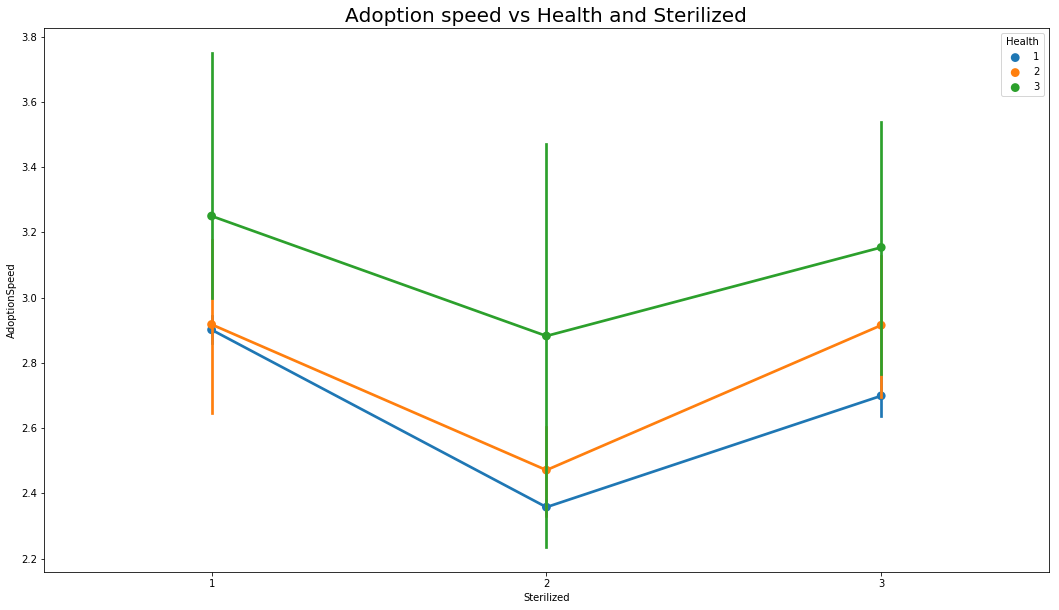

In [33]:
ax = sns.pointplot(x = 'Sterilized', y = 'AdoptionSpeed', hue = 'Health', data = df_train);
ax.set_title(label='Adoption speed vs Health and Sterilized', fontsize=20);

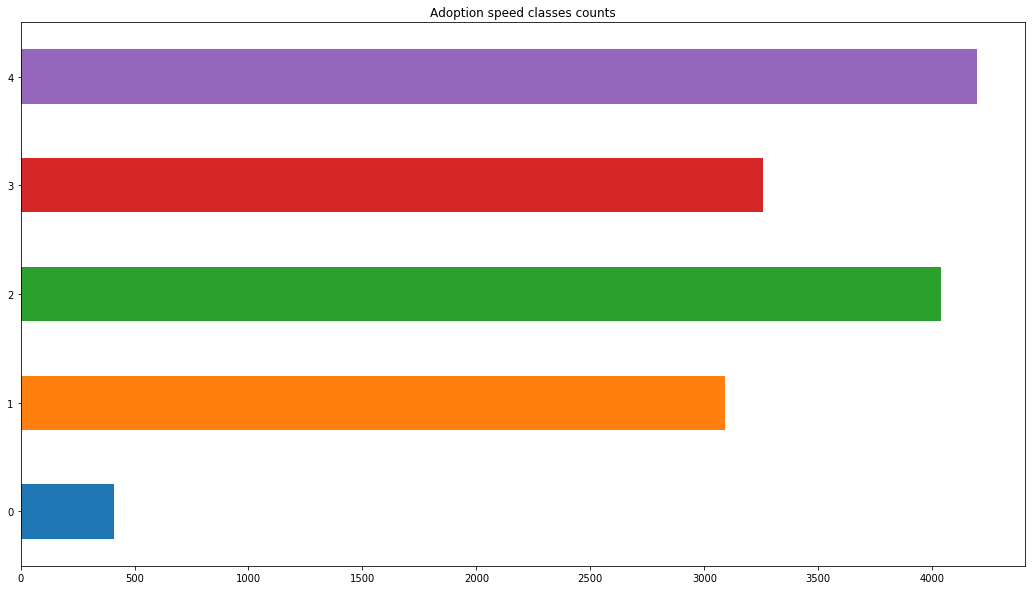

In [34]:
df_train['AdoptionSpeed'].value_counts().sort_index().plot('barh');
plt.title('Adoption speed classes counts');

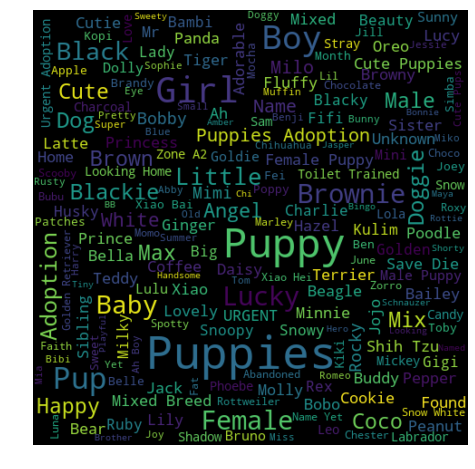

In [35]:
plt.rcParams['figure.figsize']=(15,8)
dog_txt = ' '.join(df_train.loc[df_train['Type'] == 1, 'Name'].fillna('').values)
buzz_name(dog_txt)

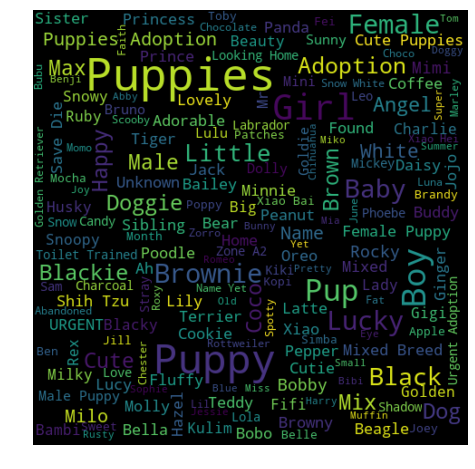

In [36]:
cat_txt = ' '.join(df_train.loc[df_train['Type'] == 2, 'Name'].fillna('').values)
buzz_name(cat_txt)

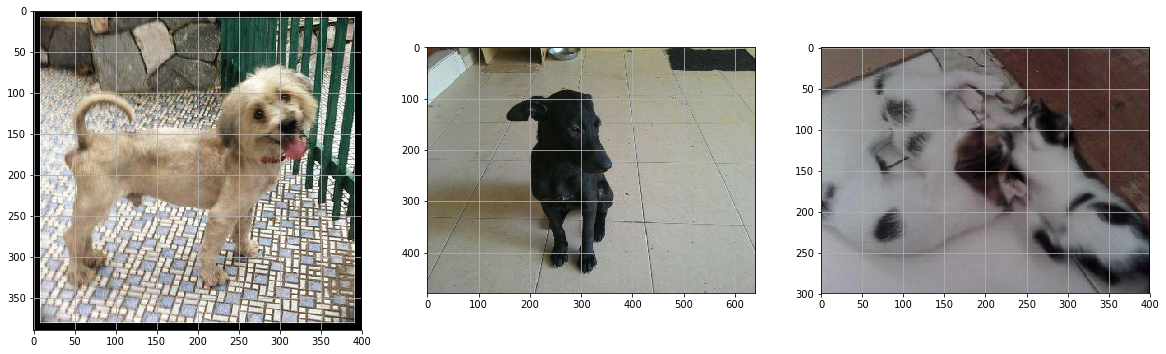

In [37]:
show_rand_img()

In [38]:
data = pd.DataFrame({
'lat':[103.733333, 100.362778, 102, 101.692222, 115.219033, 102.251111, 102.25, 102.5, 101, 100.25, 100.3292, 117, 113.781111, 101.5, 103],
'lon':[1.483333, 6.128333, 5.25, 3.153889, 5.315894, 2.188889, 2.75, 3.75, 4.75, 6.5, 5.4145, 5.25, 3.038056, 3.333333, 4.75],
'name':['Johor', 'Kedah', 'Kelantan', 'Kuala Lumpur', 'Labuan', 'Malakka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Penang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu']
})
data
 
m = folium.Map(location=[5, 108], tiles="Mapbox Bright", zoom_start=6)
 
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)
    
display(m)